In [1]:
#Logistic Regression Project

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
#Data is given as advertisment.csv

In [23]:
ad_data = pd.read_csv('advertising.csv')

In [24]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [8]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [9]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


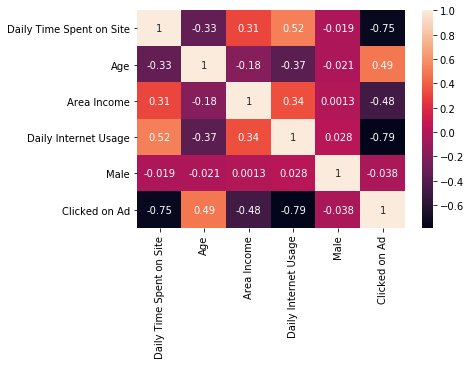

In [15]:
sns.heatmap(ad_data.corr(),annot=True)

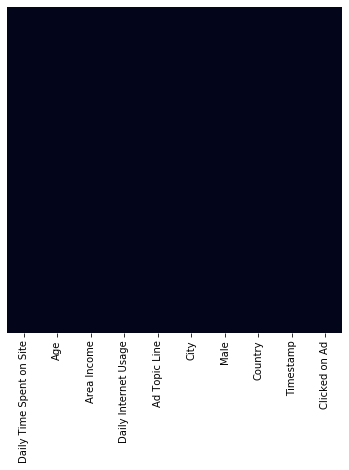

In [26]:
#Look for nulls
plt.figure(figsize=(6,6))
sns.heatmap(ad_data.isnull(),yticklabels=False,cbar=False)


In [27]:
#No null data

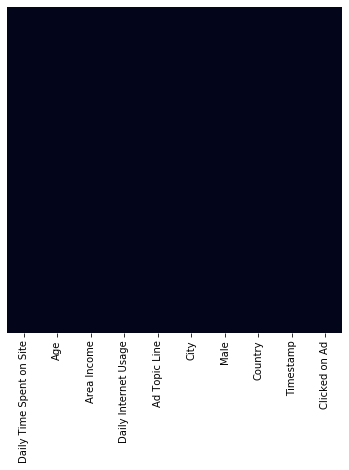

In [28]:
#Look for nulls
plt.figure(figsize=(6,6))
sns.heatmap(ad_data.isna(),yticklabels=False,cbar=False)

In [29]:
#No NaN data

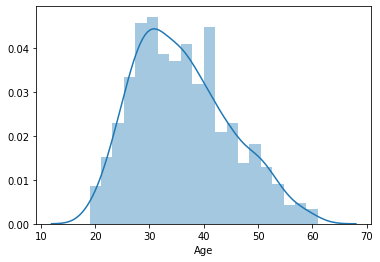

In [37]:
#Histogram and kde of 'Age' column
sns.distplot(ad_data['Age'],bins=20)

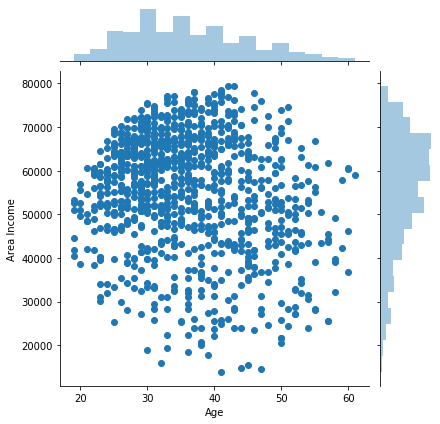

In [47]:
#Joint plot of Age vs Area Income
sns.jointplot('Age','Area Income', data = ad_data)

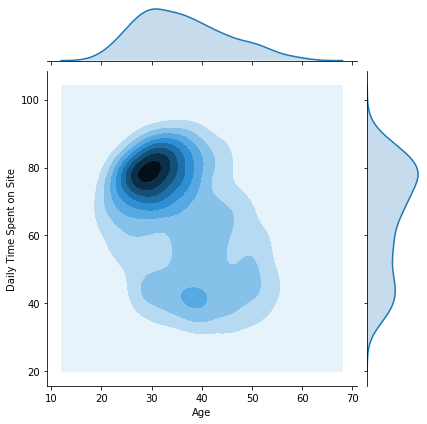

In [51]:
#Joint plot of Age vs Daily Time Spent on Site via kde plot
sns.jointplot('Age','Daily Time Spent on Site', data = ad_data, kind='kde')

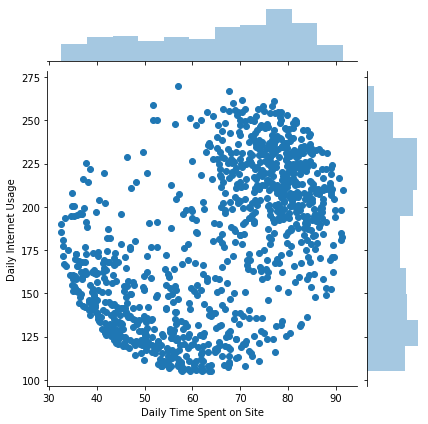

In [53]:
#Joint plot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage
sns.jointplot('Daily Time Spent on Site','Daily Internet Usage', data = ad_data)

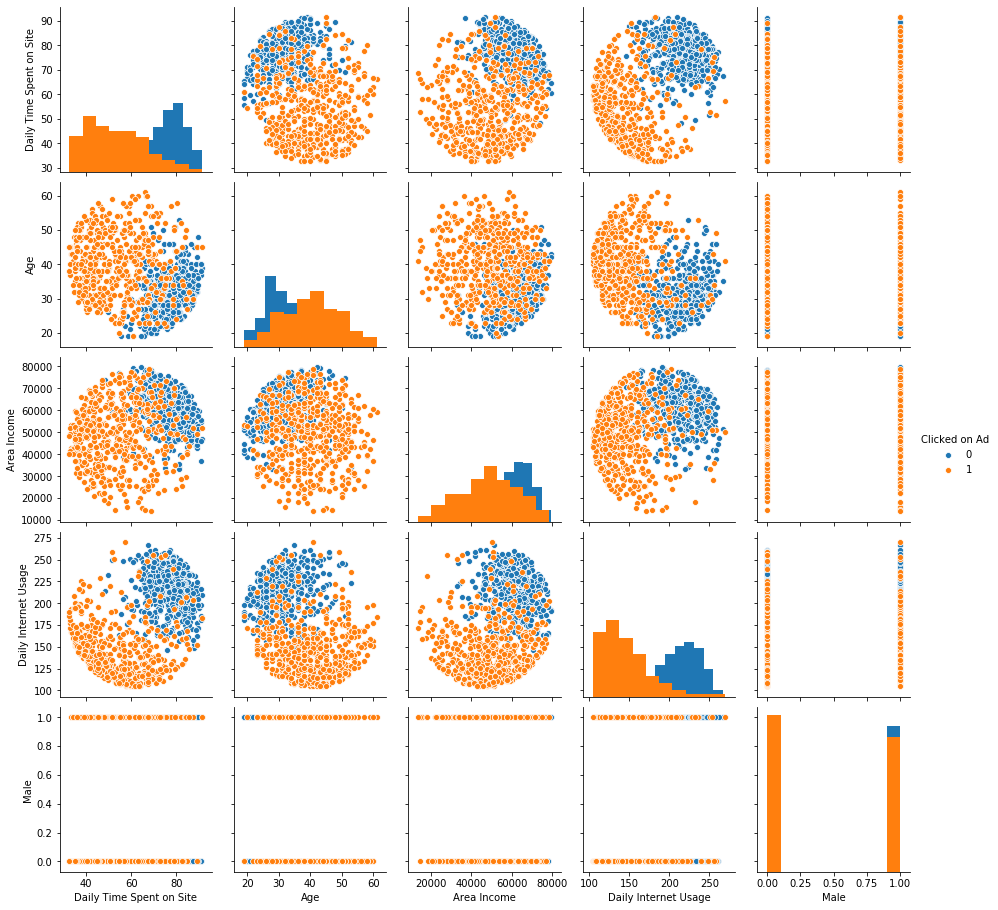

In [56]:
#Pair plot of data set hued with 'Clicked on Ad' with histogram diagonal
sns.pairplot(data = ad_data,hue='Clicked on Ad',diag_kind='hist')

In [57]:
#Now for Logistic regression study

In [58]:
#Importing logistic regression libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [61]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [67]:
#Want to predict if person will click on an ad -> y

y = ad_data['Clicked on Ad']
X = ad_data.drop(columns=['Clicked on Ad','Timestamp','Country','City','Ad Topic Line'])
#Removed non-numeric columns

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [86]:
#Make instance of LogisticRegression
logreg = LogisticRegression()

In [87]:
logreg.fit(X_train, y_train)

/Users/kieranodonnell/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
predictions = logreg.predict(X_test)

In [89]:
predictions

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,

In [90]:
from sklearn.metrics import classification_report #Get classification report
from sklearn.metrics import confusion_matrix #Get confusion matrix


In [91]:
print(classification_report(y_test, predictions,target_names=target_names))

                     precision    recall  f1-score   support

Did not click on Ad       0.97      0.99      0.98       171
      CLicked on ad       0.99      0.97      0.98       159

           accuracy                           0.98       330
          macro avg       0.98      0.98      0.98       330
       weighted avg       0.98      0.98      0.98       330



In [92]:
print(confusion_matrix(y_test, predictions))

[[170   1]
 [  5 154]]
